# YOLOv5 Litter Detection

## Configuration

In [23]:
epochs = 300
batch_size = 16
confidence_threshold = 0.3
results_dir_name = "results8"
detect_dir_name = "exp2"

## Environment

Inspect the hardware and software being used.

In [21]:
import torch

ver = torch.__version__
device = torch.cuda.get_device_properties(0) if torch.cuda.is_available() else "CPU"
print(f"torch v{ver} using {device}")

torch v1.10.0+cu113 using _CudaDeviceProperties(name='NVIDIA GeForce RTX 3060', major=8, minor=6, total_memory=12287MB, multi_processor_count=28)


## Train

Train the YOLOv5s model using the pre-trained weights.

In [ ]:
%%time
!python yolov5/train.py --batch-size $batch_size --epochs $epochs --data cfg/data.yaml --cfg cfg/yolov5s_custom.yaml --weights yolov5s.pt --name results --cache

## Visualise

Inspect the training results.

In [ ]:
# Run the command "Python: Launch TensorBoard" if you're using VS Code.
%load_ext tensorboard
%tensorboard --logdir yolov5/runs

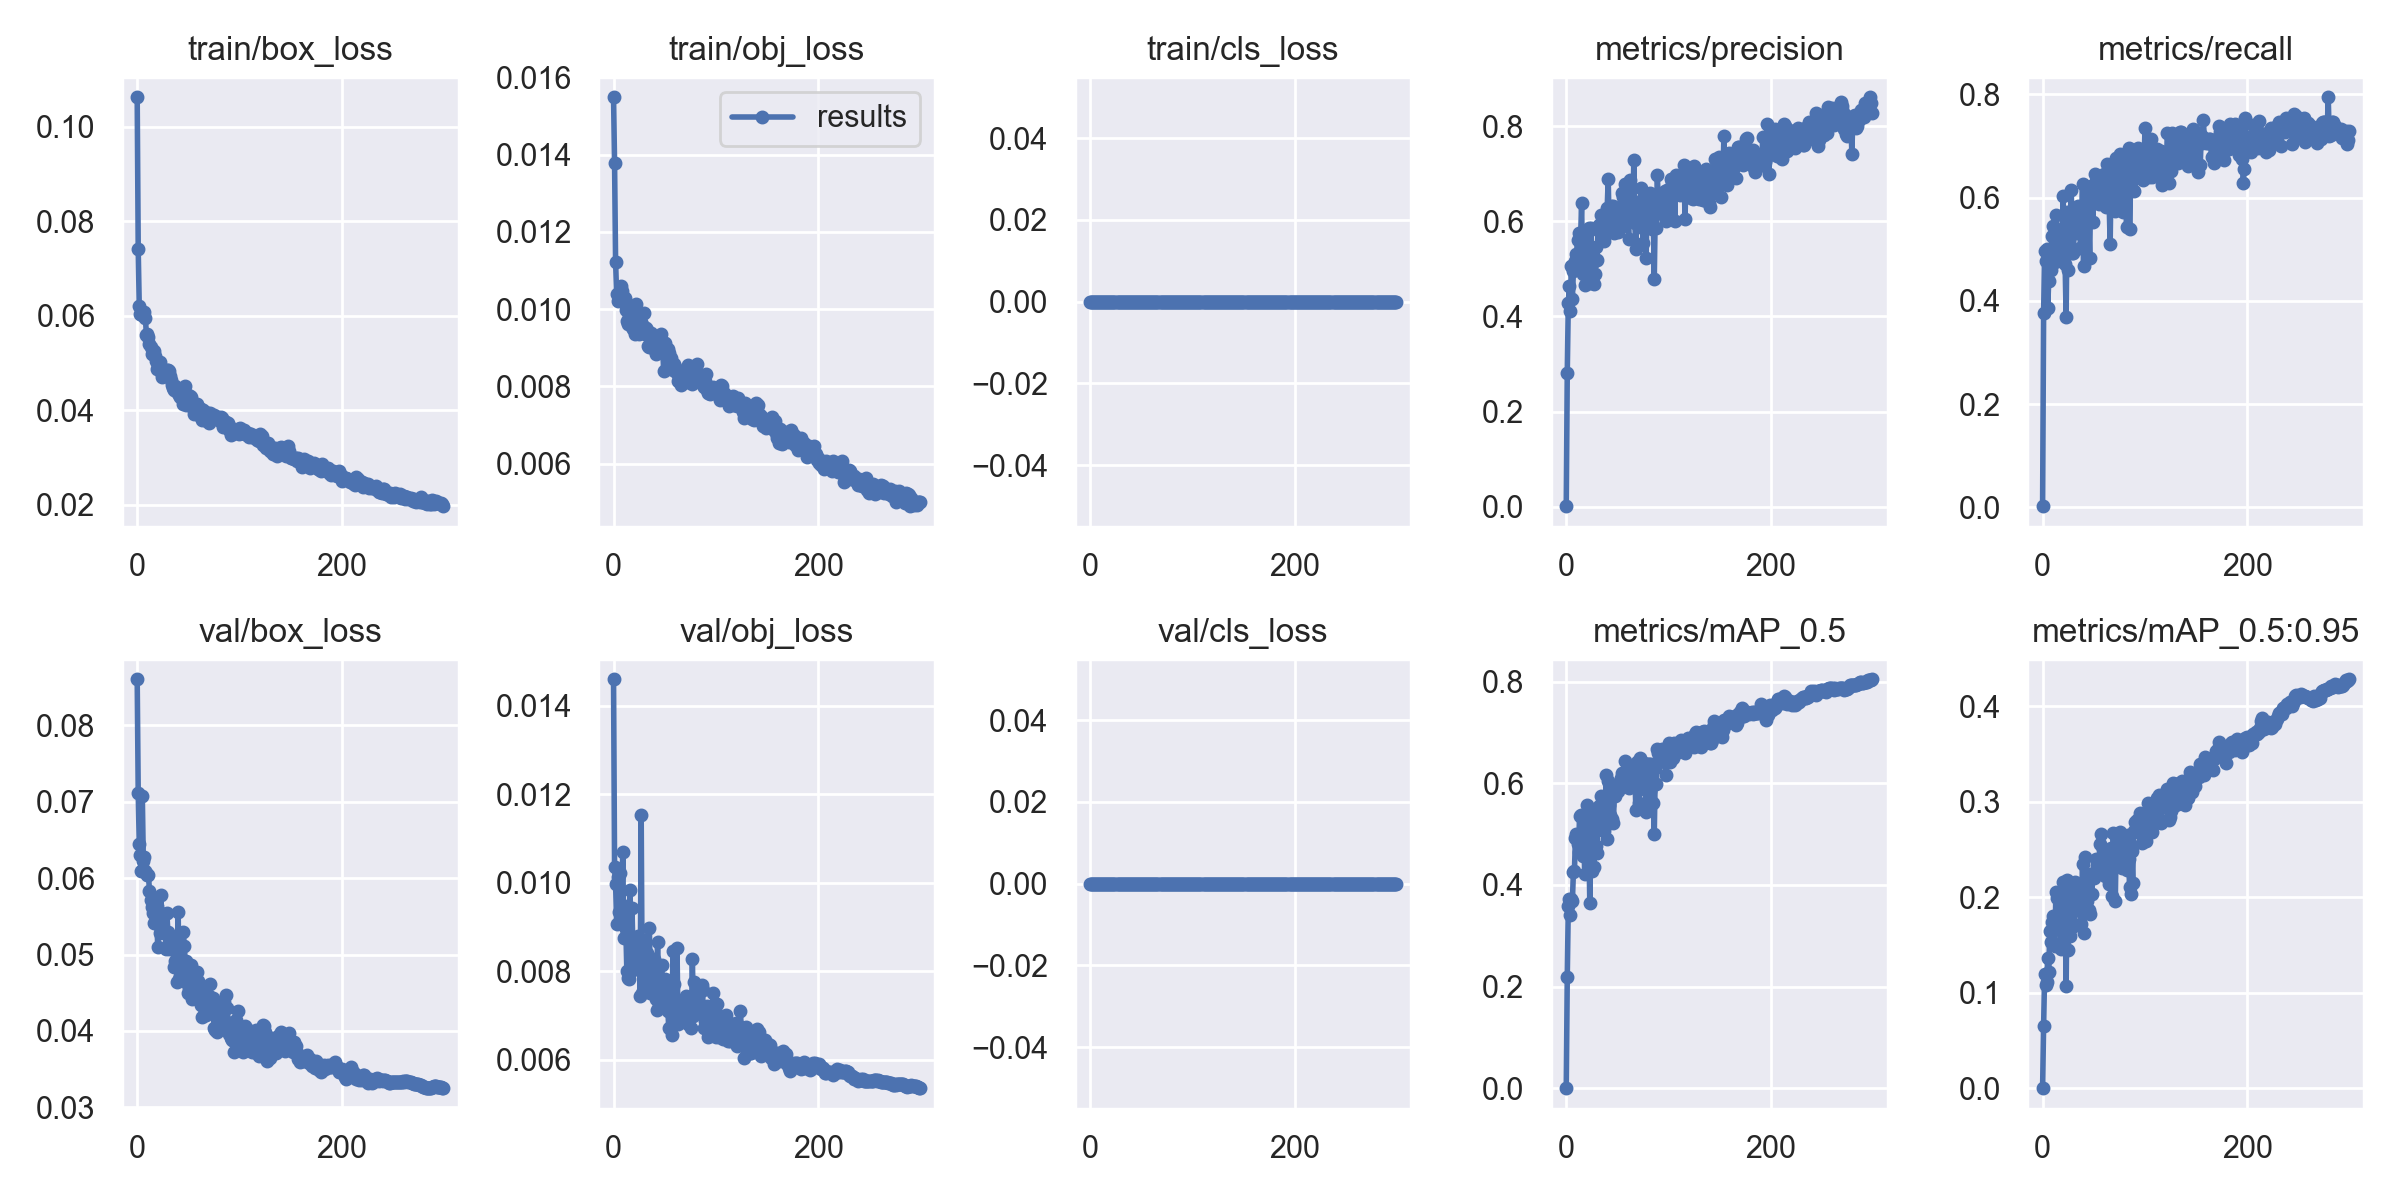

In [16]:
from IPython.display import Image
Image(filename="yolov5/runs/train/results8/results.png")

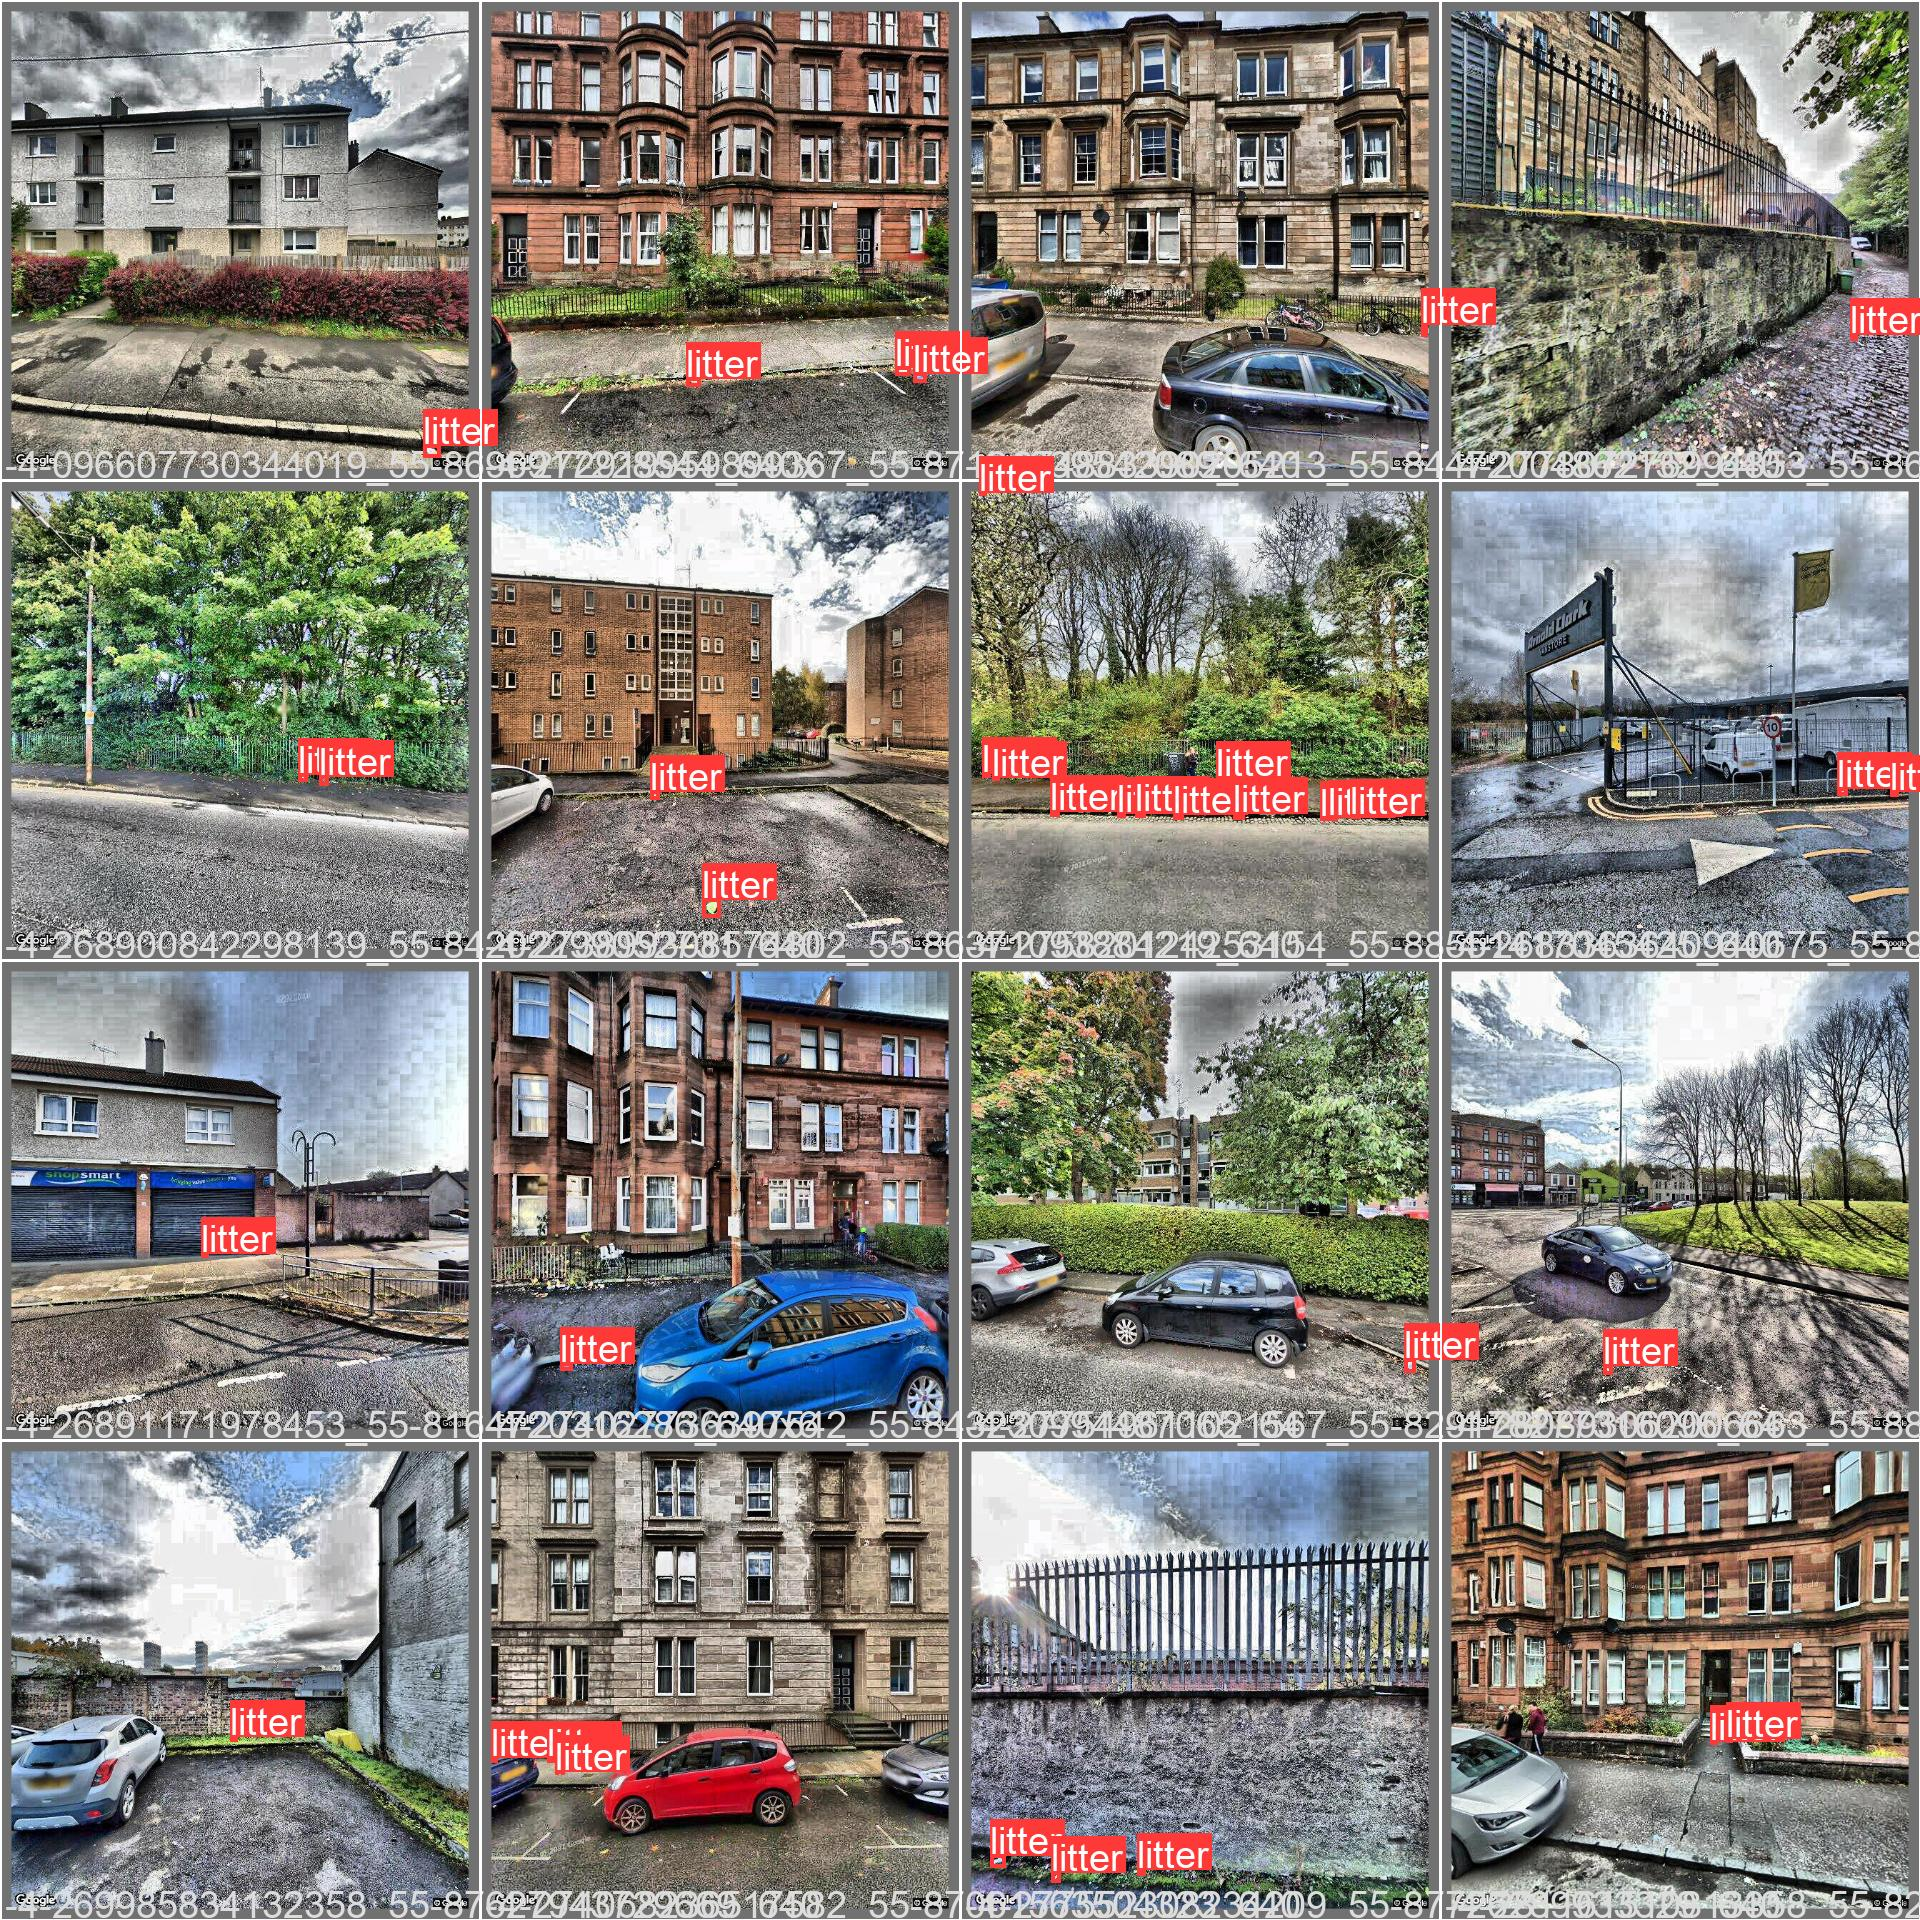

In [4]:
from IPython.display import Image
Image(filename="yolov5/runs/train/results8/val_batch0_labels.jpg")

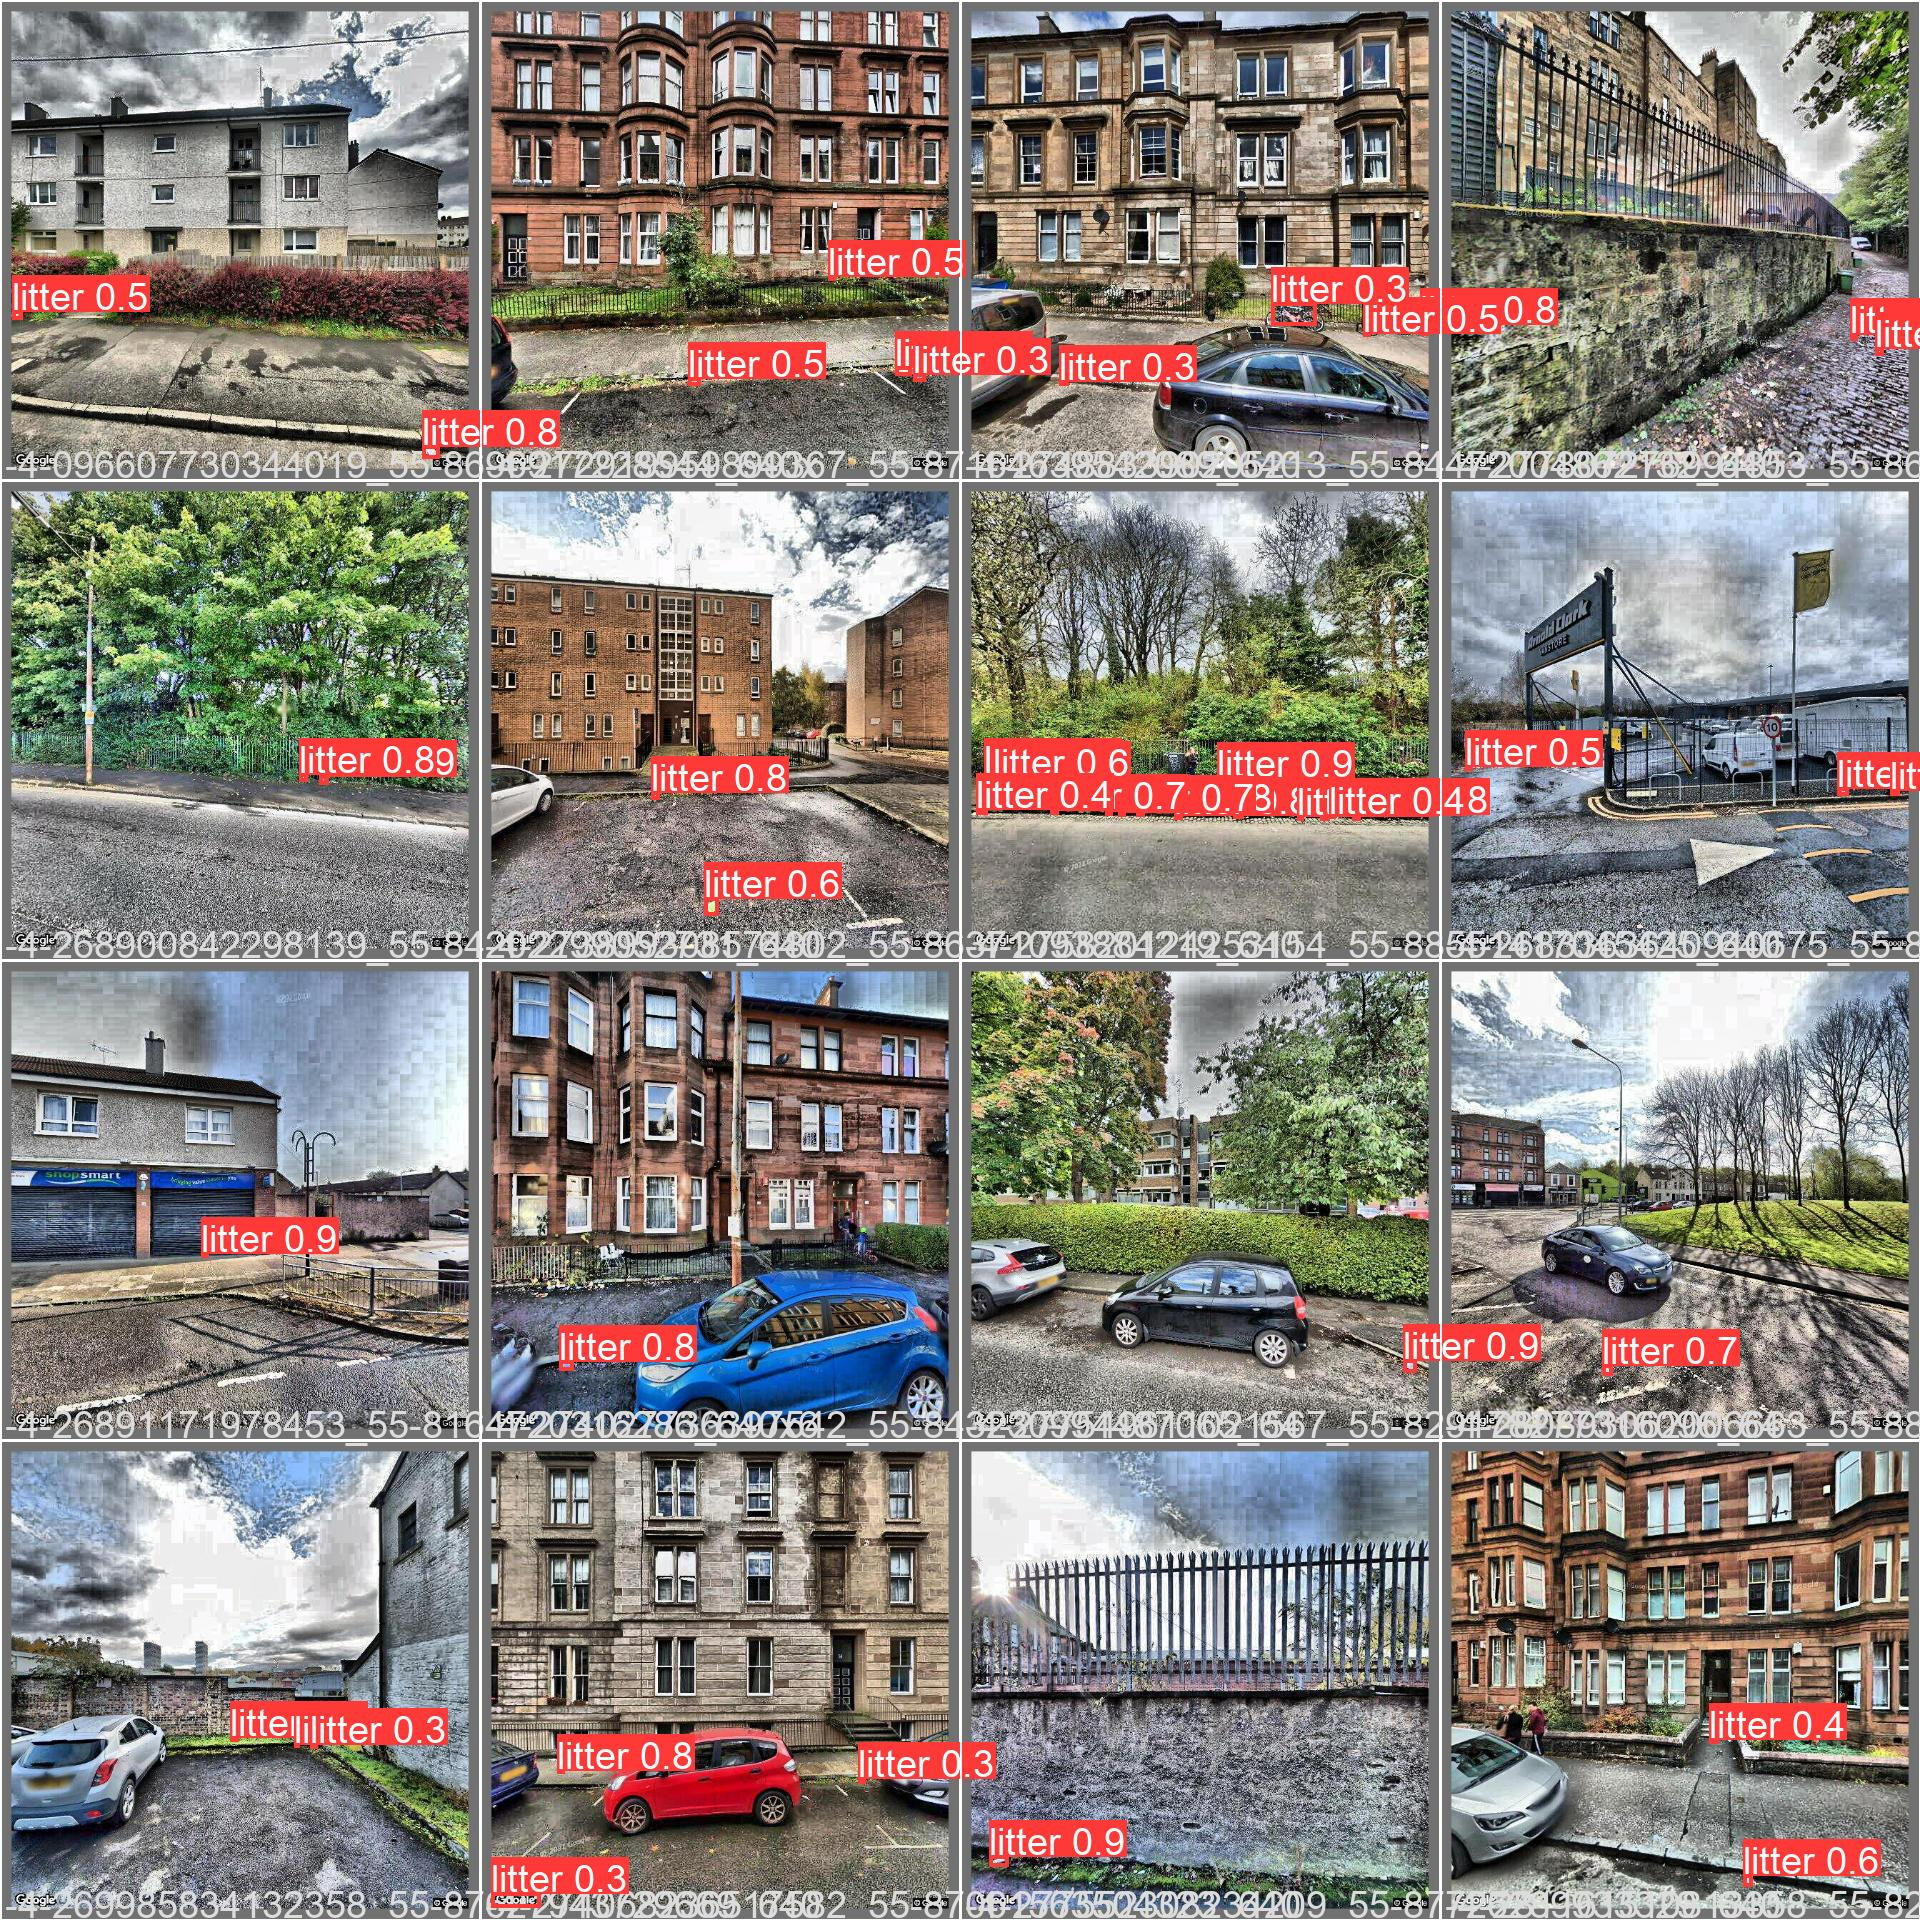

In [5]:
from IPython.display import Image
Image(filename="yolov5/runs/train/results8/val_batch0_pred.jpg")

## Inference

Detect litter in the test data.

In [25]:
%%time
!python yolov5/detect.py --weights yolov5/runs/train/$results_dir_name/weights/best.pt --conf $confidence_threshold --source ../../data/models/yolov5/test/images --save-txt

Wall time: 8.18 s


detect: weights=['yolov5/runs/train/results8/weights/best.pt'], source=../../data/models/yolov5/test/images, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2021-12-9 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/121 C:\Users\Gary Blackwood\dev\glasgow-litter\data\models\yolov5\test\images\-4-105765115020765_55-86589085097411_640x640_jpg.rf.91c70ace422c19f9a24a498dc8854f60.jpg: 640x640 3 litters, Done. (0.008s)
image 2/121 C:\Users\Gary Blackwood\dev\glasgow-litter\data\models\yolov5\test\images\-4-1079024790464365_55-849819434982564_640x640_jpg.rf.75612a55

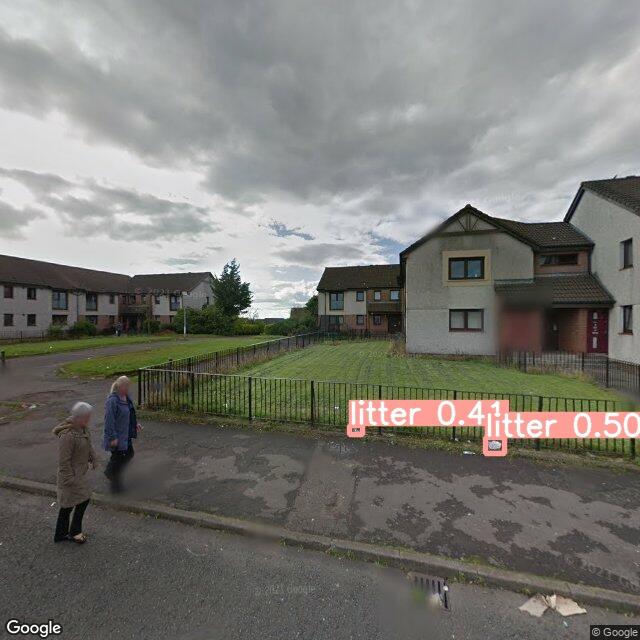

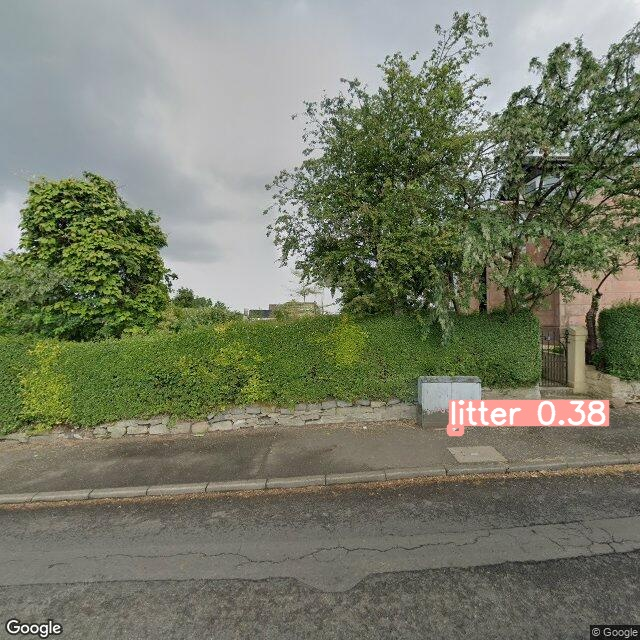

In [26]:
import glob
from IPython.display import Image, display

files = glob.glob(f"yolov5/runs/detect/{detect_dir_name}/*.jpg")
for fname in files[:2]:
    display(Image(fname))
    print("\n")

In [17]:
%%time
!python yolov5/val.py --batch-size $batch_size --data cfg/data.yaml --weights yolov5/runs/train/$results_dir_name/weights/best.pt --name results

Wall time: 29.6 s


val: data=cfg/data.yaml, weights=['yolov5/runs/train/results8/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5\runs\val, name=results, exist_ok=False, half=False, dnn=False
YOLOv5  2021-12-9 torch 1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)

Fusing layers... 
Model Summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs

val: Scanning '..\..\data\models\yolov5\valid\labels.cache' images and labels... 243 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 243/243 [00:00<?, ?it/s]
val: Scanning '..\..\data\models\yolov5\valid\labels.cache' images and labels... 243 found, 0 missing, 0 empty, 0 corrupted: 100%|██████████| 243/243 [00:00<?, ?it/s]

               Class     Images     Labels          P          R     mAP@.5 mAP@
               Class     Images     Labels          P      

In [29]:
import glob
import json

metadata = {"images": {}}
files = glob.glob(f"yolov5/runs/detect/{detect_dir_name}/*.jpg")
with open(f"yolov5/runs/detect/{detect_dir_name}/metadata.json", mode="w", encoding="utf8") as file:
    for path in files:
      tokens = path.split("/")
      fname = tokens[-1].split("\\")[-1].split(".rf")[0]
      if fname.startswith("-"):
        fname = fname[1:]
        fname = "-" + fname.replace("-", ".")
      else:
        fname = fname.replace("-", ".")
      fname = fname.replace("_jpg", ".jpg")
      metadata["images"][fname] = {"path": "models/yolov5/" + path}
    file.write(json.dumps(metadata))